# KNN on iris with PCA

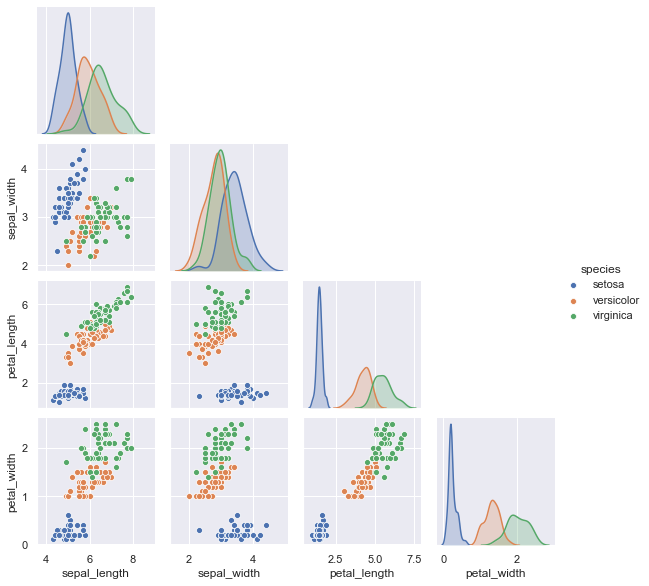

In [75]:
import seaborn as sns; sns.set()

iris = sns.load_dataset('iris')

iris.shape

#classes = iris['species'].astype('category').cat.categories.tolist()

Y = iris['species']#.astype('category').cat.codes
X = iris.drop(columns='species')

sns.pairplot(iris, hue='species', corner=True, height=2)

from sklearn.model_selection import train_test_split as TTS
X_tr, X_te, Y_tr, Y_te = TTS(X, Y, random_state=1, stratify=Y)

In [76]:
from sklearn.decomposition import PCA
#HYPERPARAMETRE n_components
pca = PCA()

In [77]:
#Calibrage du PCA
pca.fit(X_tr)

PCA()

In [78]:
#Application du PCA
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

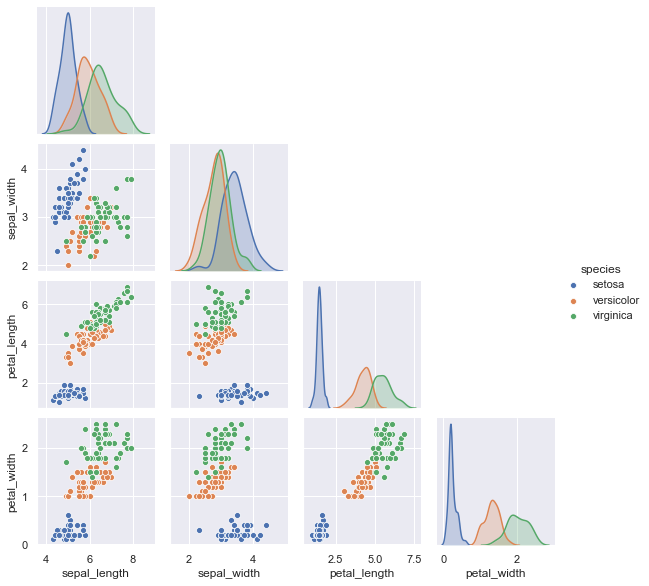

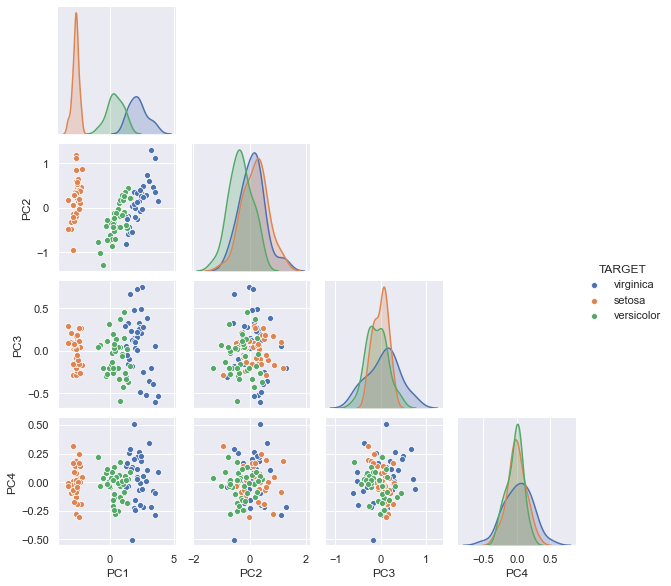

In [79]:
#On construit la DataFrame transformé
import pandas as pd
import numpy as np

data_PCA = np.append(X_tr_PCA, Y_tr.to_numpy().reshape(-1, 1),axis=1)
iris_PCA = pd.DataFrame(data=data_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'TARGET'])
iris_PCA.head()

sns.pairplot(iris, hue='species', corner=True, height=2)
sns.pairplot(iris_PCA, hue='TARGET', corner=True, height=2)

#iris_PCA2 = iris_PCA[['PC1', 'PC2', 'TARGET']]

Text(0.5, 1.0, 'Graphe pour choisir le nombre de PC :')

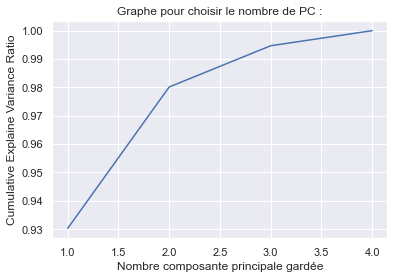

In [80]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([i for i in range(1, 5)], cumsum)
plt.xlabel("Nombre composante principale gardée")
plt.ylabel("Cumulative Explaine Variance Ratio")
plt.title("Graphe pour choisir le nombre de PC :")

In [81]:
pca = PCA(n_components=2)
pca.fit(X_tr)
X_tr_PCA = pca.transform(X_tr)
X_te_PCA = pca.transform(X_te)

(X_tr_PCA.shape, X_te_PCA.shape)

((112, 2), (38, 2))

In [82]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=3)
knn.fit(X_tr_PCA, Y_tr)
predictions = knn.predict(X_te_PCA)
def accuracy(preds, Y):
    return (preds == Y).sum()/len(Y)
accuracy(predictions, Y_te)

0.9736842105263158